# MIE1613 Project: Developing a sampling procedure for past housing emissions

In [5]:
# Import Libraries
# Data
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import random

import re
from copy import deepcopy
#from tqdm import tqdm
import tqdm.notebook as tq

#Viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
sns.set(font='Helvetica') # Futura? Calibri Light? 
sns.set_style("white")
sns.set_theme(style='ticks')
sns.set_context('talk')

## Import and analyze historic data
I have historic monthly housing starts for Toronto for the last ~30 years. 

In [6]:
to_starts_df = pd.read_csv("data/new_dwellings_historic.csv", encoding='unicode_escape', header=2).iloc[:409,:]
to_starts_df.index = pd.date_range(start='1/1/90', end='30/1/24', freq='MS')
to_starts_df = to_starts_df.drop('Unnamed: 0', axis=1)
to_starts_df = to_starts_df.replace(',','', regex=True)
to_starts_df = to_starts_df.astype(float)
to_starts_df['year'] = to_starts_df.index.year
to_starts_df['month'] = to_starts_df.index.month
to_starts_df['quarter'] = to_starts_df.index.quarter

to_starts_df

,Single,Semi-Detached,Row,Apartment,All,year,month,quarter
1990-01-01,777.0,8.0,35.0,1615.0,2435.0,1990,1,1
1990-02-01,439.0,2.0,276.0,815.0,1532.0,1990,2,1
1990-03-01,502.0,0.0,37.0,1467.0,2006.0,1990,3,1
1990-04-01,716.0,36.0,190.0,898.0,1840.0,1990,4,2
1990-05-01,711.0,10.0,172.0,1091.0,1984.0,1990,5,2
...,...,...,...,...,...,...,...,...
2023-09-01,406.0,36.0,676.0,3757.0,4875.0,2023,9,3
2023-10-01,434.0,22.0,288.0,2964.0,3708.0,2023,10,4
2023-11-01,419.0,56.0,392.0,1437.0,2304.0,2023,11,4
2023-12-01,329.0,16.0,174.0,917.0,1436.0,2023,12,4


In [44]:
#to_starts_df.to_csv('starts_inputs_toronto.csv')

In [7]:
to_starts_df.groupby('month').mean()

,Single,Semi-Detached,Row,Apartment,All,year,quarter
month,,,,,,,
1,660.228571,149.857143,277.285714,1084.828571,2172.200000,2007.0,1.0
2,595.500000,123.176471,264.588235,1319.117647,2302.382353,2006.5,1.0
3,646.323529,132.764706,321.411765,1465.970588,2566.470588,2006.5,1.0
4,978.588235,204.235294,396.147059,1472.000000,3050.970588,2006.5,2.0
5,1083.823529,203.147059,427.117647,1137.441176,2851.529412,2006.5,2.0
6,1099.882353,189.941176,387.029412,1434.676471,3111.529412,2006.5,2.0
7,1072.205882,178.529412,428.764706,1400.647059,3080.147059,2006.5,3.0
8,1025.352941,185.382353,443.058824,1568.823529,3222.617647,2006.5,3.0
9,990.705882,204.235294,379.147059,1411.500000,2985.588235,2006.5,3.0


Single
Semi-Detached
Row
Apartment
All
Single
Semi-Detached
Row
Apartment
All


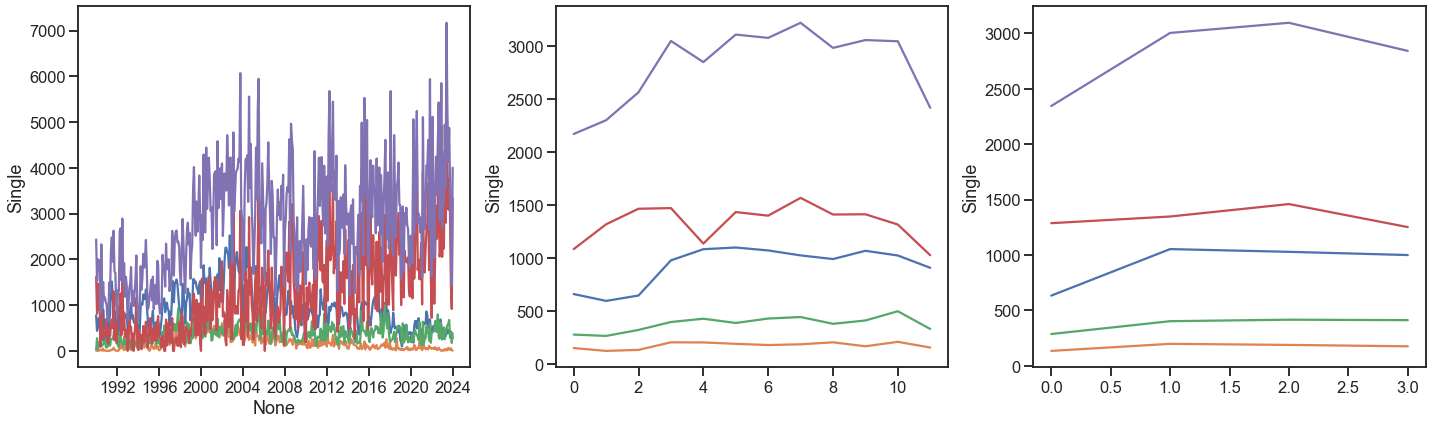

In [5]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
for c in to_starts_df.columns[:-3]:
    sns.lineplot(ax=ax[0], data=to_starts_df, x=to_starts_df.index, y=to_starts_df[c])

#for y in np.arange(2000, 2024):
#    plt_data = to_starts_df.loc[to_starts_df['year'] == y,:]
#    sns.lineplot(ax=ax[1], data=plt_data, x=np.arange(1,13), y="All", color='b', alpha=0.8)

for c in to_starts_df.columns[:-3]:
    print(c)
    sns.lineplot(ax=ax[1], data=to_starts_df.groupby('month').mean(), x=np.arange(12), y=c)

for c in to_starts_df.columns[:-3]:
    print(c)
    sns.lineplot(ax=ax[2], data=to_starts_df.groupby('quarter').mean(), x=np.arange(4), y=c)

plt.tight_layout()

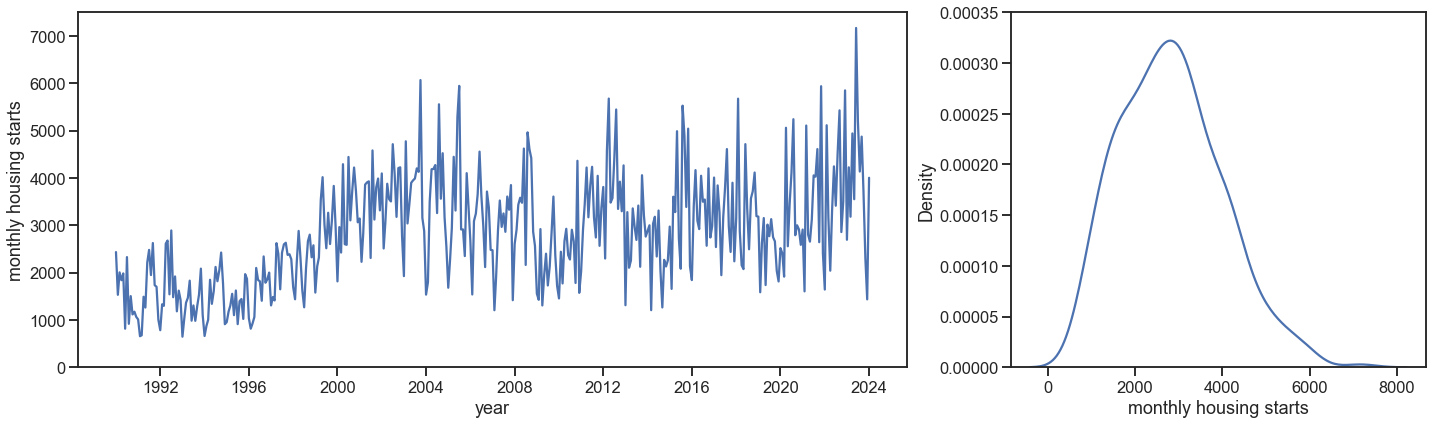

In [6]:
fig = plt.figure(figsize=(20, 6))  # Adjust total figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.lineplot(ax=ax1, data=to_starts_df, x=to_starts_df.index, y=to_starts_df['All'])
sns.kdeplot(ax=ax2, data=to_starts_df, x=to_starts_df['All'])

ax1.set_ylabel('monthly housing starts')
ax1.set_xlabel('year')
ax2.set_xlabel('monthly housing starts')

ax1.set_ylim([0,7500])
ax2.set_ylim([0,0.00035])
#ax2.vlines(6000, 0, 0.00035, color='black', linestyles='--')
#ax1.vlines(np.datetime64('2001-01-01'), 0, 7500, color='black', linestyles='--')


plt.tight_layout()

Look at distribution of starts

C:\Users\Keagan Rankin\AppData\Local\Temp\ipykernel_12792\3519426940.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  to_starts_df.loc['2000':][['Single','Semi-Detached','Row','Apartment','All']].hist(ax=ax)


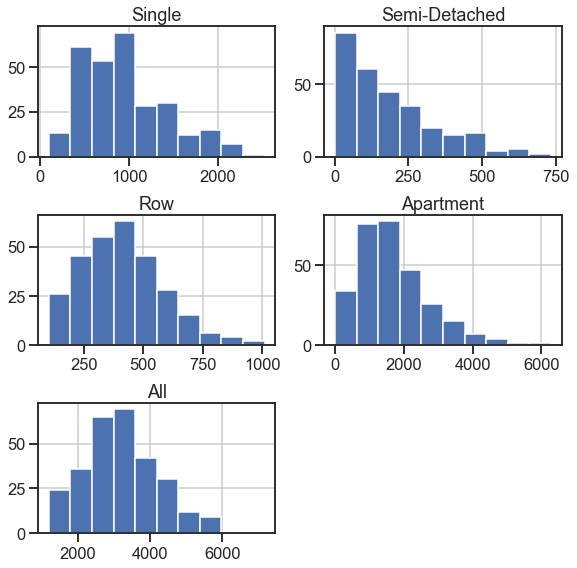

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
to_starts_df.loc['2000':][['Single','Semi-Detached','Row','Apartment','All']].hist(ax=ax)
plt.tight_layout()

Starts are reported by month

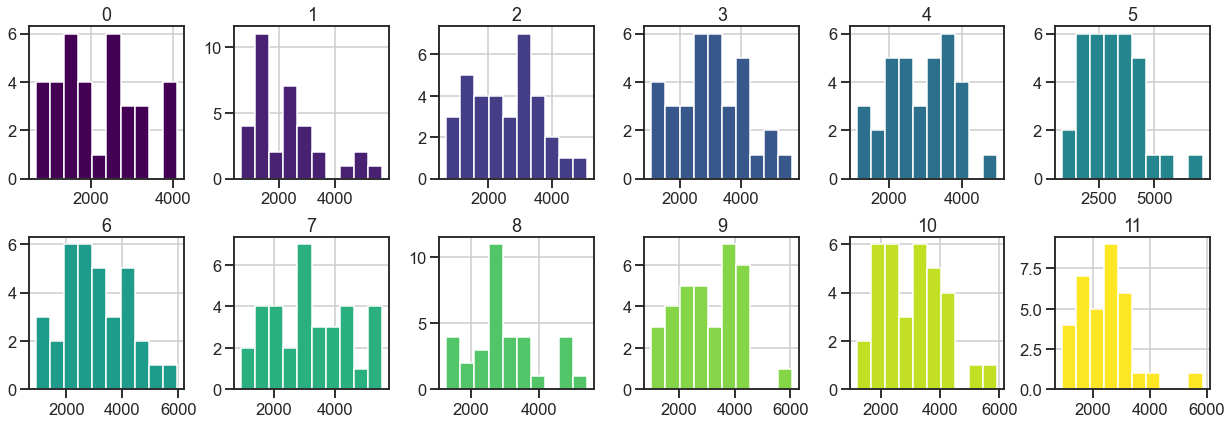

In [8]:
fig, ax = plt.subplots(2,6,figsize=(17,6))
color = plt.cm.viridis(np.linspace(0, 1, 12))

for y, a in enumerate(ax.reshape(-1)):
    plt_data = to_starts_df.loc[to_starts_df.index.month == y+1]
    plt_data['All'].hist(ax=a,color=color[y])
    a.set_title(y)
    #sns.lineplot(data=plt_data, x=np.arange(1,13), y="All", color='b', alpha=0.8)

#to_starts_df.loc[to_starts_df.index.month == 1]
#plt_data
plt.tight_layout()

Look at potential trend: changes over 5 or 10 year blocks

0.02136476588250158
0.004549674242823299
0.010135778795044011
0.00531089128742087
0.0054339947890115455


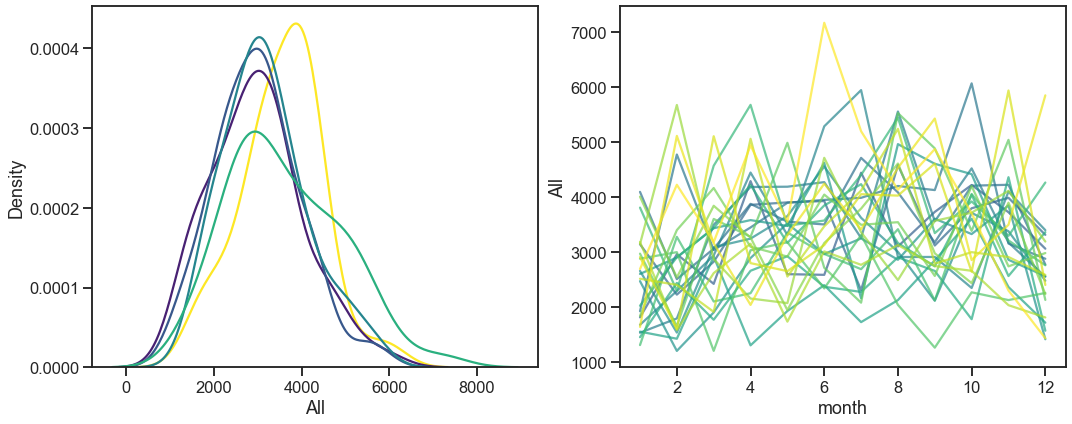

In [9]:
to_starts_df
fig, ax = plt.subplots(1,2, figsize=(15,6))
color = plt.cm.viridis(np.linspace(0, 1, 12))

# define five year time increments
dates = [np.datetime64('2001-01-01'),
         np.datetime64('2005-01-01'),
         np.datetime64('2010-01-01'),
         np.datetime64('2015-01-01'),
         np.datetime64('2020-01-01'),
         np.datetime64('2024-01-01')]

for i in range(5):
    # get 5 year time increment
    starts_5 = to_starts_df[dates[i]:dates[i+1]]

    # poisson check
    means = starts_5[['All','year','month','quarter']].groupby('month').agg({'All':'mean'})
    vars = starts_5[['All','year','month','quarter']].groupby('month').agg({'All':'var'})
    print(np.mean(means/vars))

    # plot hist
    sns.kdeplot(ax=ax[0], data=starts_5, x=starts_5['All'], color=color[2*i-1])
    #sns.lineplot(ax=ax, data=starts_5, x='month', y='All', color=color[2*i-1])

color = plt.cm.viridis(np.linspace(0, 1, 2024-1990))
# loop over year and monthly
for i in range(2000, 2024):
    starts_y = to_starts_df.loc[to_starts_df['year'] == i]

    sns.lineplot(ax=ax[1], data=starts_y, x='month', y='All', color=color[i-1990], alpha=0.7)

plt.tight_layout()

group by year

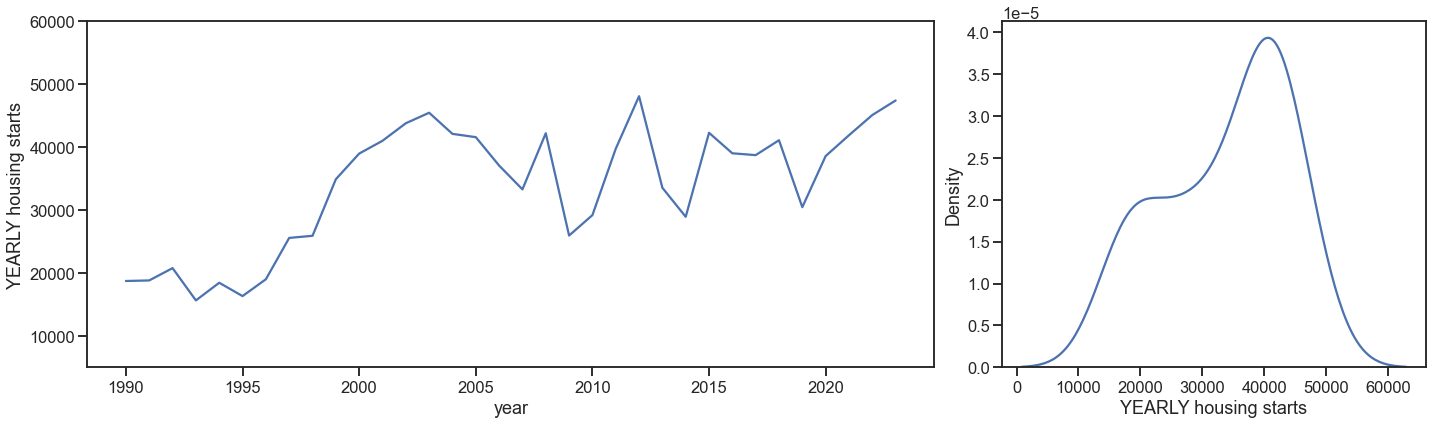

In [41]:
to_starts_df_year = to_starts_df.groupby('year').sum()

fig = plt.figure(figsize=(20, 6))  # Adjust total figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.lineplot(ax=ax1, data=to_starts_df_year.loc[:2023], x=to_starts_df_year.loc[:2023].index, y='All')
sns.kdeplot(ax=ax2, data=to_starts_df_year.loc[:2023], x='All')

ax1.set_ylabel('YEARLY housing starts')
ax1.set_xlabel('year')
ax2.set_xlabel('YEARLY housing starts')

ax1.set_ylim([5000,60000])
#ax2.set_ylim([0,0.00035])
#ax2.vlines(6000, 0, 0.00035, color='black', linestyles='--')
#ax1.vlines(np.datetime64('2001-01-01'), 0, 7500, color='black', linestyles='--')


plt.tight_layout()

In [8]:
to_starts_df_year

NameError: name 'to_starts_df_year' is not defined

In [30]:
print(to_starts_df.iloc[:-1]["All"].sum())
to_starts_df_year.loc[:2023]['All'].sum()

1149786.0


1149786.0

## Canadian housing starts
We can do the same analysis as above but for Canadian housing starts

<Axes: xlabel='year'>

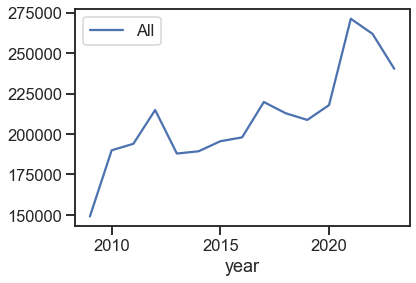

In [9]:
p = 'data/starts_historic_canada_yearly.csv'
ca_starts_df = pd.read_csv(p, index_col=0)

ca_starts_df.loc[2009:].plot()

In [10]:
ca_starts_df['All'].values

array([ 90194,  90509,  92531,  68579,  83246, 102409, 113527, 138276,
       127311, 122340, 164632, 141345, 108858, 125577, 130095, 148624,
       165658, 166565, 134474, 164123, 196878, 210415, 190528, 233653,
       249914, 268529, 222123, 231456, 273203, 245724, 227667, 197049,
       158601, 177973, 125860, 162645, 134900, 165826, 199785, 245986,
       222562, 215382, 181630, 156197, 168271, 155443, 154057, 110933,
       124713, 147040, 137439, 149968, 151653, 162733, 205034, 218426,
       233431, 225481, 227395, 228343, 211056, 149081, 189930, 193950,
       214827, 187923, 189329, 195535, 197915, 219763, 212843, 208685,
       217880, 271198, 261849, 240267], dtype=int64)

## Time-Series model
From the R time-series analysis, both the toronto and the Canadian housing starts data fits a random walk ARIMA(0,1,0). We can use this model to generate sample paths.
<br><br>
It may be better to generate starts using an appropriate time series model, such as an ARIMA model, and use bootstrap outputs of this model as sample future starts for the simulation. This should still give us an emperical distribution of starts for each year on which we could perform importance sampling for example. I have a file that does this in R already

In [11]:
import statsmodels.api as sm

Fit

In [240]:
# Fit using statsmodel API
sm_arima = sm.tsa.statespace.SARIMAX

# can take the log of the starts to 
rw_data = np.log(ca_starts_df['All'])
#rw_data = ca_starts_df["All"].loc[2000:]
rw_model = sm_arima(rw_data,
                    trend='t',
                    order=(0,1,0))

rw_fit = rw_model.fit()
print(rw_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    All   No. Observations:                   76
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  34.841
Date:                Sat, 06 Apr 2024   AIC                            -65.681
Time:                        15:10:10   BIC                            -61.046
Sample:                             0   HQIC                           -63.831
                                 - 76                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.000      0.382      0.702      -0.001       0.001
sigma2         0.0231      0.004      5.226      0.000       0.014       0.032
Ljung-Box (L1) (Q):                   1.59   Jarque-

c:\Users\Keagan Rankin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Keagan Rankin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='year'>

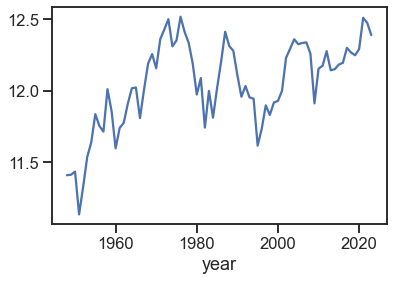

In [241]:
np.log(ca_starts_df['All']).plot()#.values

Samples of the past data fit

In [242]:
# statsmodel has this as a state model, get initial state for generation
state_i = rw_fit.smoothed_state[:,0]

# gen
past_sp = rw_fit.simulate(len(rw_data),
                          repetitions=200,
                          initial_state=state_i)#.plot(ax=ax)

past_sp = np.exp(past_sp)
#past_sp#.plot(ax=ax)

<Axes: xlabel='year'>

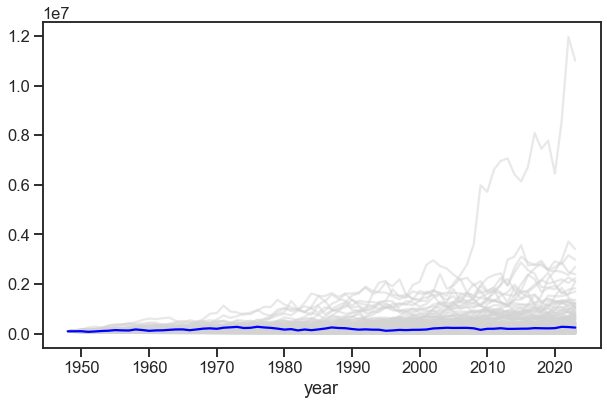

In [243]:
fig, ax = plt.subplots(figsize=(10,6))

for r in past_sp.columns:
    past_sp[r].plot(ax=ax, color='lightgrey', alpha=0.5)

#np.log(ca_starts_df['All']).plot(ax=ax, color='red')
ca_starts_df['All'].plot(ax=ax, color='blue')

#ax.set_ylim([0,400000])

Sample paths of future state

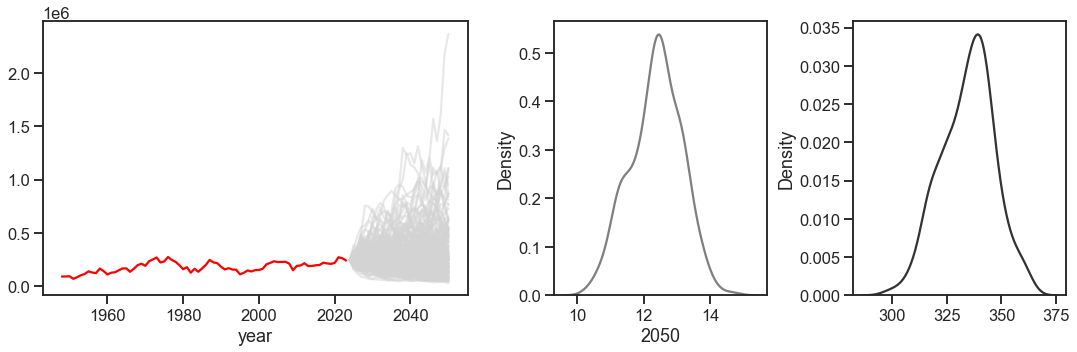

In [245]:
state_p = rw_fit.predicted_state[:,-1]

forecast_sp = rw_fit.simulate(27,
                          repetitions=300,
                          initial_state=state_p)#.plot(ax=ax)

#sns.lineplot(data=past_sp)
forecast_sp.index = np.arange(2024,2051)

fig = plt.figure(figsize=(15, 5))  # Adjust total figure size
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])


for r in past_sp.columns:
    np.exp(forecast_sp[r]).plot(ax=ax1, color='lightgrey', alpha=0.5)

#np.log(ca_starts_df['All']).plot(ax=ax, color='red')

ca_starts_df['All'].plot(ax=ax1, color='red')
sns.kdeplot(forecast_sp.loc[2050], color='grey', ax=ax2)
sns.kdeplot(forecast_sp.sum(axis=0), color='black', alpha=0.8, ax=ax3)

plt.tight_layout()

## Explanatory Regression
alternatively, we can use explanatory variables with some stochastic component to perform a regression. Population would be the most obvious variable -> mean population estimate in each year

In [12]:
# import data
# population
pop_cany_df = pd.read_csv('data/population_historic_canada_yearly.csv', index_col=0)
#gdp
gdp_cany_df = pd.read_csv('data/gdp_historic_canada_yearly.csv', index_col=0)
#cpi
cpi_cany_df = pd.read_csv('data/cpi_historic_canada_yearly.csv', index_col=0)

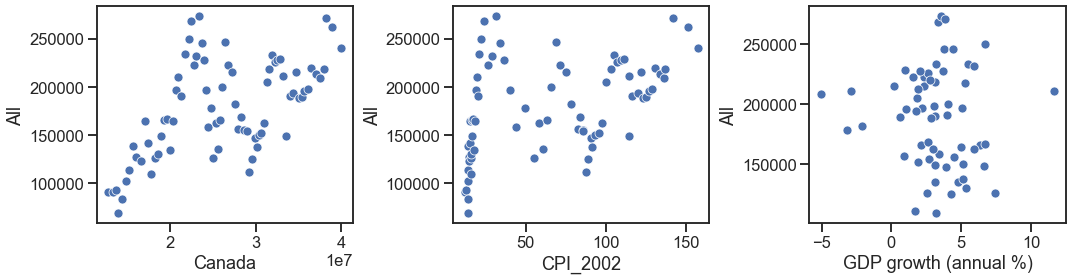

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.scatterplot(x=pop_cany_df['Canada'], y=ca_starts_df['All'], ax=ax[0])
sns.scatterplot(x=cpi_cany_df['CPI_2002'], y=ca_starts_df['All'], ax=ax[1])
sns.scatterplot(x=gdp_cany_df['GDP growth (annual %)'], y=ca_starts_df['All'], ax=ax[2])


#sns.lineplot(pop_cany_df['Canada'], ax=ax[1], color='red')
#axr = ax[1].twinx()
#sns.lineplot(ca_starts_df['All'], ax=axr, color='blue')

plt.tight_layout()

<b> IDEA </b>
<br>
Fit a simple linear baysian model to the above. This will let us sample from the parameter posteriors. Then, bootstrap over the Canadian population projections and plug them into the model to get a range of sample paths. We can use two simple regressors used in the other paper: population and average CPI for the gien year <br><br>
We can use PyMC3 to fit the bayesian model -> see google colab ipynb file housing_pym3.ipynb

In [15]:
# for verification agaisnt bayesian model
y = ca_starts_df['All'].values
x = pop_cany_df['Canada'].values

x = sm.add_constant(x)
mld = sm.OLS(y,x).fit()
mld.summary()
#print(mld['params'])
#print(mld['r2'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     36.31
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           6.03e-08
Time:                        19:02:14   Log-Likelihood:                -913.78
No. Observations:                  76   AIC:                             1832.
Df Residuals:                      74   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.733e+04   1.74e+04      4.453      0.000    4.27e+04    1.12e+05
x1             0.0039      0.001      6.026      0.000       0.003       0.005
==============================================================================
Omnibus:                        4.501   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.297
Skew:                           0.581   Prob(JB):                        0.117
Kurtosis:                       2.918   Cond. No.                     1.01e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""